In [0]:
!sudo apt install libspatialindex-dev
!pip install geopandas
!pip install descartes
!pip install Fiona==1.8.4
!apt-get install ca-certificates
!pip install pysal==1.14.4.post2
!pip install mapclassify==2.0.1
!pip install rtree
!pip install plotly==3.9.0
!pip install cufflinks==0.15
!pip install folium
!pip install bokeh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20180409).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
import ogr                           # GDAL/OGR
import shapely                       # Herramientas para manipulación geométrica
from shapely.geometry import *
import fiona

%matplotlib inline


In [0]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requiere version >= 3.0.0

3.9.0


In [0]:
import cufflinks as cf
print(cf.__version__)


0.15


In [0]:
cf.set_config_file(offline=True)

In [0]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show, output_file, save, reset_output

In [0]:
init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import plotly 
plotly.tools.set_credentials_file(username='campopinillos', api_key='aSOEabC0UzOrKGMIVw2K')

## <h1 align='center'>POSITIVA COMPAÑÍA DE SEGUROS  <br> ANALISIS DE LA INVERSION Y  SIENIESTRALIDAD <br> EMPRESAS AFILIADAS  2017 <h1/>

**Jeimy Aristizabal, Campo Elias Pinillos**

A continuación se cargan y curzan los datos por empresa y el archivo .shx con los poligonos por municipio:

In [0]:
df = gpd.read_file("mpio.shx")
df['MPIOS'] = df['MPIOS'].astype(dtype='float64')

In [0]:
data = pd.read_csv('Inversion y Siniestralidad 2017.csv')
datos= pd.merge(data,df,left_on='CODIGO_MUNICIPIO',right_on='MPIOS',how='outer',)
datos.head()

,ID_TIPO_DOC,ID_EMPRESA,AÑO,CODIGO_MUNICIPIO,RAZON_SOCIAL,DEPARTAMENTO_DANE,CODIGO_DEPARTAMENTO,MUNICIPIO_DANE,SECT_ACT_ECON,TAMAÑO,NUMERO_TRABAJADORES,RIESGO,ATENCIONPYP,TOTAL.INV.PYP,CODIGO_DEPARTAMENTO.1,COSTO_SINIESTRALIDAD,CANTIDAD,COSTO AT,COSTO ATG,COSTO ATM,COSTO EP,CANTIDAD AT,CANTIDAD ATG,CANTIDAD ATM,CANTIDAD EP,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,CC,516.0,2014.0,11001.0,GUILLERMO RUIZ LARA,"BOGOTÁ, D.C.",11.0,"BOGOTA, D.C.",SERVICIO DOMÉSTICO,MICROEMPRESA,4.0,1.0,EDUCA VIRTUAL,12000.0,11.0,93584.0,1.0,93584.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.650948e+09,323322.540454,726.0,684.0,11,SANTAFE DE BOGOTA D.C,001,SANTAFE DE BOGOTA D.C.,SANTAFE DE BOGOTA,CM,11001.0,ZONA01,DABOG,DABOGZONA01,165094.778,"POLYGON ((1006435.805163531 1021680.391597671,..."
1,CC,516.0,2015.0,11001.0,GUILLERMO RUIZ LARA,"BOGOTÁ, D.C.",11.0,"BOGOTA, D.C.",SERVICIO DOMÉSTICO,MICROEMPRESA,3.0,1.0,EDUCA VIRTUAL,12000.0,11.0,122504.0,1.0,122504.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.650948e+09,323322.540454,726.0,684.0,11,SANTAFE DE BOGOTA D.C,001,SANTAFE DE BOGOTA D.C.,SANTAFE DE BOGOTA,CM,11001.0,ZONA01,DABOG,DABOGZONA01,165094.778,"POLYGON ((1006435.805163531 1021680.391597671,..."
2,CC,2192.0,2014.0,11001.0,FRANCO ARBELAEZ AUGUSTO,"BOGOTÁ, D.C.",11.0,"BOGOTA, D.C.",SERVICIO DOMÉSTICO,MICROEMPRESA,2.0,1.0,EDUCA VIRTUAL,12000.0,11.0,89728.0,1.0,89728.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.650948e+09,323322.540454,726.0,684.0,11,SANTAFE DE BOGOTA D.C,001,SANTAFE DE BOGOTA D.C.,SANTAFE DE BOGOTA,CM,11001.0,ZONA01,DABOG,DABOGZONA01,165094.778,"POLYGON ((1006435.805163531 1021680.391597671,..."
3,CC,5597.0,2015.0,11001.0,TORRES GARAY MARCO ANTONIO,"BOGOTÁ, D.C.",11.0,"BOGOTA, D.C.","AGRICULTURA, GANADERÍA, CAZA Y SILVICULTURA",MICROEMPRESA,4.0,2.0,SECTORIALES,12000.0,11.0,11197756.0,2.0,11197756.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.650948e+09,323322.540454,726.0,684.0,11,SANTAFE DE BOGOTA D.C,001,SANTAFE DE BOGOTA D.C.,SANTAFE DE BOGOTA,CM,11001.0,ZONA01,DABOG,DABOGZONA01,165094.778,"POLYGON ((1006435.805163531 1021680.391597671,..."
4,CC,7412.0,2016.0,11001.0,JULIO CESAR RICO AVENDAÑO,"BOGOTÁ, D.C.",11.0,"BOGOTA, D.C.",SERVICIO DOMÉSTICO,MICROEMPRESA,2.0,1.0,EDUCA VIRTUAL,12000.0,11.0,125358.0,1.0,125358.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.650948e+09,323322.540454,726.0,684.0,11,SANTAFE DE BOGOTA D.C,001,SANTAFE DE BOGOTA D.C.,SANTAFE DE BOGOTA,CM,11001.0,ZONA01,DABOG,DABOGZONA01,165094.778,"POLYGON ((1006435.805163531 1021680.391597671,..."


Se utilizan unicamente los datos para 2017.

In [0]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194652 entries, 0 to 194651
Data columns (total 41 columns):
ID_TIPO_DOC              194499 non-null object
ID_EMPRESA               194499 non-null float64
AÑO                      194499 non-null float64
CODIGO_MUNICIPIO         194483 non-null float64
RAZON_SOCIAL             194499 non-null object
DEPARTAMENTO_DANE        194499 non-null object
CODIGO_DEPARTAMENTO      194499 non-null float64
MUNICIPIO_DANE           194499 non-null object
SECT_ACT_ECON            194495 non-null object
TAMAÑO                   194495 non-null object
NUMERO_TRABAJADORES      193842 non-null float64
RIESGO                   194495 non-null float64
ATENCIONPYP              194491 non-null object
TOTAL.INV.PYP            194499 non-null float64
CODIGO_DEPARTAMENTO.1    194499 non-null float64
COSTO_SINIESTRALIDAD     194499 non-null float64
CANTIDAD                 194499 non-null float64
COSTO AT                 190136 non-null float64
COSTO ATG     

In [0]:
datos.iplot(kind='box',x='TOTAL.INV.PYP', y='TAMAÑO')

Relación entre costos de siniestralidad e Inversión en Promoción y Prevención

In [0]:
datos.iplot(kind='scatter',x='TOTAL.INV.PYP',y='COSTO_SINIESTRALIDAD',mode='markers',
            xTitle='Inversión',yTitle = 'Costo Siniestralidad', title='SINIESTRALDIAD VS INVERSION')


In [0]:
datos['TAMAÑO'].unique()

array(['MICROEMPRESA', 'UNIPERSONALES', 'PEQUEÑA', 'MEDIANA', 'GRANDE',
       nan], dtype=object)

In [0]:
colormap = {'GRANDE': 'red', 'MEDIANA': 'green', 'PEQUEÑA': 'blue', 'MICROEMPRESA': 'onrange', 'UNIPERSONALES': 'yellow'}
datos['color'] = datos['TAMAÑO'].map(lambda x: colormap[x])
output_file("SINIESTROS.html", title="Siniestralidad.py example")

p = figure(width=500, height=500)
p.xaxis.axis_label = 'Inversión'
p.yaxis.axis_label = 'Siniestralidad'

output_file("ejemplo.html")
p.circle(x="TOTAL.INV.PYP", y="COSTO_SINIESTRALIDAD",
        color=datos["color"], fill_alpha=0.2, size=10, source=datos)
output_notebook()
show(p)

In [0]:
TOOLTIPS = [
    ("indice", "$index"),
    ("(x,y)", "(@TOTAL.INV.PYP, @COSTO_SINIESTRALIDAD)")
]

p = figure(plot_width=400, plot_height=400,tooltips=TOOLTIPS)
p.circle(x='TOTAL.INV.PYP', y='COSTO_SINIESTRALIDAD', size=20,fill_alpha=0.2, source=datos)
output_notebook()
show(p)

In [0]:
tamano = ['GRANDE', 'MEDIANA', 'PEQUEÑA', 'MICROEMPRESA', 'UNIPERSONALES']
cantidades = datos['TOTAL.INV.PYP']

In [0]:



p = figure(x_range=tamano, plot_height=250, y_range=(0, 9), title="Inversión")
p.vbar(x='TAMAÑO', top='TOTAL.INV.PYP', width=0.9, legend="TAMAÑO", source=datos)

p.xgrid.grid_line_color = None # Quita las rayas verticales
# Ubicación de la leyenda
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

output_notebook()
show(p)

Distribución de la inversión en promoción y prevención por sector económico

In [0]:
configure_plotly_browser_state() 
datos.iplot(kind='bar',x='SECT_ACT_ECON',y='TOTAL.INV.PYP')

Distribución de la siniestralidad por sector económico.

In [0]:
configure_plotly_browser_state() 
datos.iplot(kind='bar',x='SECT_ACT_ECON',y='COSTO_SINIESTRALIDAD')

In [0]:
municipio = pd.read_csv("MUNICIPIO 2017.csv")
municipios = pd.merge(df,municipio,left_on='MPIOS',right_on='CODIGO_MUNICIPIO',how='left')
municipios

<h2>Información agregada por Municipio<h2/>

In [0]:
municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1122 entries, 0 to 1121
Data columns (total 31 columns):
AREA                   1122 non-null float64
PERIMETER              1122 non-null float64
WCOLGEN02_             1122 non-null int64
WCOLGEN021             1122 non-null int64
DPTO                   1122 non-null object
NOMBRE_DPT             1122 non-null object
MPIO                   1122 non-null object
NOMBRE_MPI             1122 non-null object
NOMBRE_CAB             1122 non-null object
CLASEMUN               1122 non-null object
MPIOS                  1122 non-null float64
ZONA                   1122 non-null object
OF_REG                 1122 non-null object
REG_ZONAS              1122 non-null object
HECTARES               1122 non-null float64
geometry               1122 non-null object
CODIGO_DEPARTAMENTO    969 non-null float64
CODIGO_MUNICIPIO       969 non-null float64
T_INVERSION_PYP        969 non-null float64
EMPRESAS               969 non-null float64
T_C

In [0]:
municipios

In [0]:
municipios.geometry.name

'geometry'

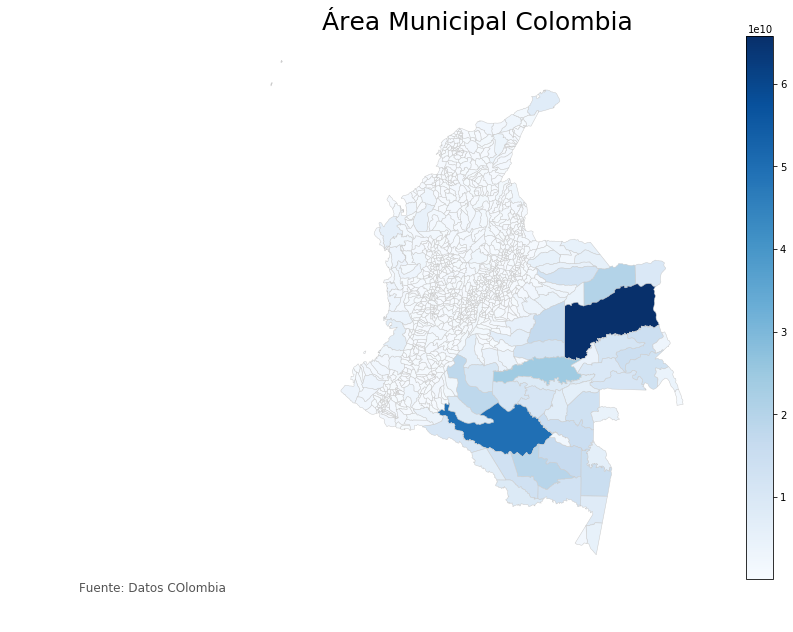

In [0]:
vmin, vmax = municipios['AREA'].min(), municipios['AREA'].max()
variable='AREA'
fig, ax = plt.subplots(1, figsize=(15,10))

municipios.plot(column=variable,cmap='Blues',linewidth=0.5,ax=ax,edgecolor='0.8',legend=False)
ax.axis('off')
ax.set_title('Área Municipal Colombia', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Fuente: Datos COlombia',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning:

Invalid value encountered in median



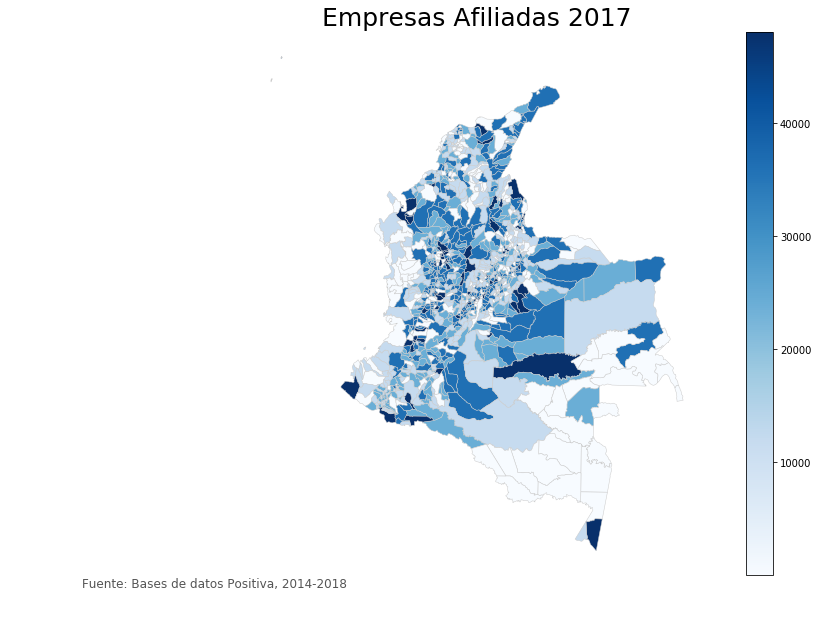

In [0]:
vmin, vmax = municipios['EMPRESAS'].min(), municipios['EMPRESAS'].max()

variable='EMPRESAS'

fig, ax = plt.subplots(1, figsize=(15,10))

municipios.plot(column=variable,cmap='Blues',scheme='Box_Plot',linewidth=0.5,ax=ax,edgecolor='0.8',legend=False)
ax.axis('off')
ax.set_title('Empresas Afiliadas 2017', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Fuente: Bases de datos Positiva, 2014-2018',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning:

Invalid value encountered in median



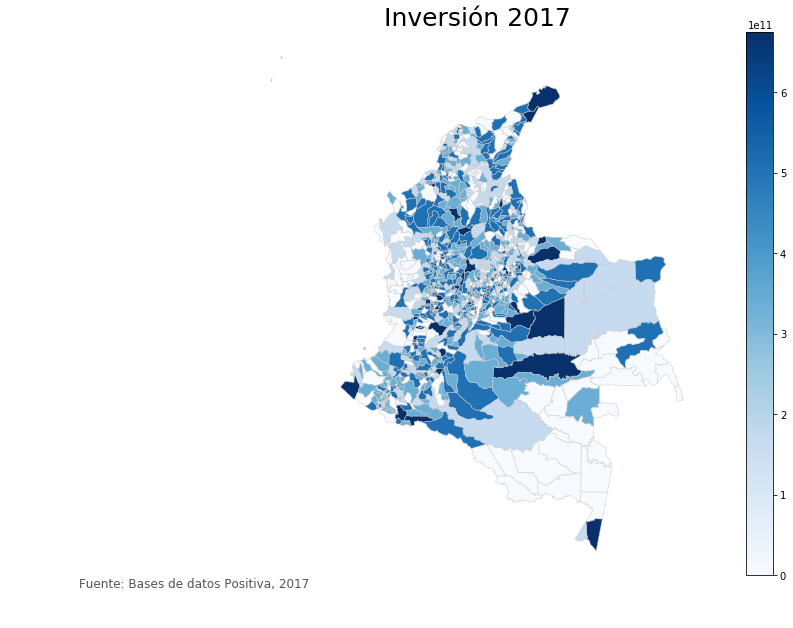

In [0]:
vmin, vmax = municipios['T_INVERSION_PYP'].min(), municipios['T_INVERSION_PYP'].max()

variable='T_INVERSION_PYP'
fig, ax = plt.subplots(1, figsize=(15,10))

municipios.plot(column=variable,cmap='Blues',scheme='Box_Plot',linewidth=0.5,ax=ax,edgecolor='0.8',legend=False)
ax.axis('off')
ax.set_title('Inversión 2017', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Fuente: Bases de datos Positiva, 2017',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning:

Invalid value encountered in median



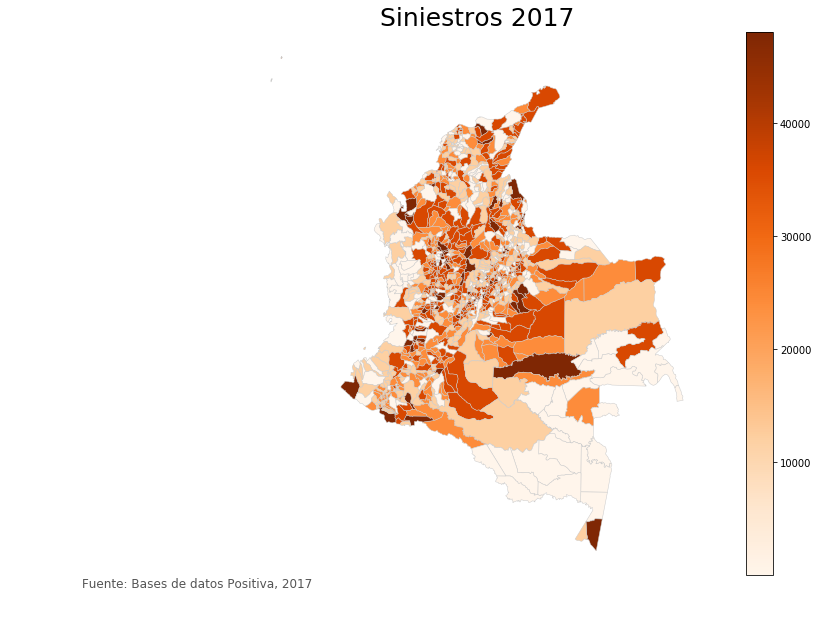

In [0]:
vmin, vmax = municipios['T_SINISTROS'].min(), municipios['T_SINISTROS'].max()

variable='T_SINISTROS'
fig, ax = plt.subplots(1, figsize=(15,10))

municipios.plot(column=variable,cmap='Oranges',scheme='Box_Plot',linewidth=0.5,ax=ax,edgecolor='0.8',legend=False)
ax.axis('off')
ax.set_title('Siniestros 2017', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Fuente: Bases de datos Positiva, 2017',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:276: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning:

Invalid value encountered in median



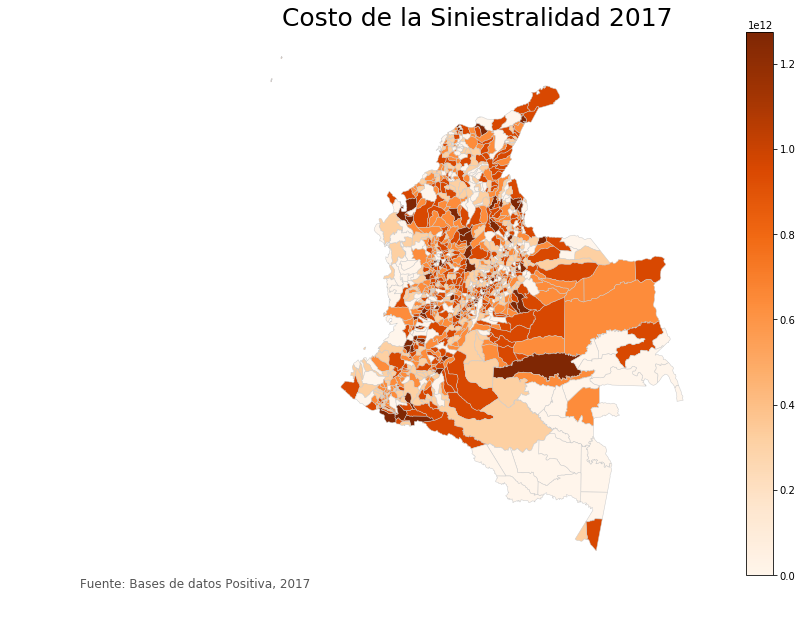

In [0]:
vmin, vmax = municipios['T_COSTO_SINISTROS'].min(), municipios['T_COSTO_SINISTROS'].max()

variable='T_COSTO_SINISTROS'
fig, ax = plt.subplots(1, figsize=(15,10))

municipios.plot(column=variable,cmap='Oranges',scheme='Box_Plot',linewidth=0.5,ax=ax,edgecolor='0.8',legend=False)
ax.axis('off')
ax.set_title('Costo de la Siniestralidad 2017', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Fuente: Bases de datos Positiva, 2017',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

In [0]:
# Importamos las principales librerias que usuaremos
import numpy as np
import pandas as pd
import folium
import branca.colormap as cm
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import branca.colormap as cm
import seaborn as sns

In [0]:
Bog_lat_long = (4.624335, -74.063644)

mapa = folium.Map(location=Bog_lat_long, zoom_start=10, control_scale=True,prefer_canvas=True)
FastMarkerCluster(name ="Cluster de coordenadas" ,data=list(zip(datos.geometry,datos.geometry))).add_to(mapa_2)
mapa_2.save("mapa_con_cluster_origen.html")